In [9]:
import pandas as pd
import numpy as np

# ===============================
# 1) Load Dataset
# ===============================
df = pd.read_csv("Real_estate.csv")

# ===============================
# 2) Feature Engineering
# ===============================

# Log-transform of price
df["log_price"] = np.log(df["Y house price of unit area"])

# Price per 100m distance to MRT
df["price_per_mrt"] = df["Y house price of unit area"] / (df["X3 distance to the nearest MRT station"] + 1)

# Age category
df["age_category"] = pd.cut(
    df["X2 house age"],
    bins=[0, 10, 20, 30, 100],
    labels=["new", "mid", "old", "very_old"],
    right=False
)

# Standardize numerical features
numeric_cols = [
    "X2 house age",
    "X3 distance to the nearest MRT station",
    "X4 number of convenience stores"
]

for col in numeric_cols:
    df[f"{col}_z"] = (df[col] - df[col].mean()) / df[col].std()

# Interaction feature: age × stores
df["age_store_interaction"] = df["X2 house age"] * df["X4 number of convenience stores"]

# ===============================
# 3) Save Engineered Dataset
# ===============================

output_path = "Real_estate_FE.csv"
df.to_csv(output_path, index=False)

print("✔ File saved successfully:")
print(output_path)

# Display first rows
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Real_estate.csv'

عدد الصفوف قبل التنظيف: 414
عدد الصفوف بعد التنظيف: 303


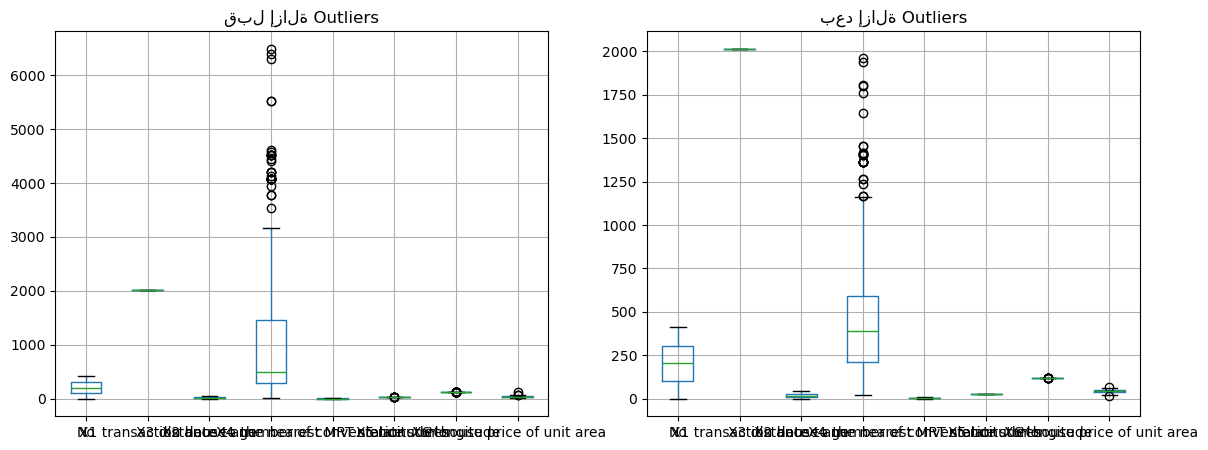

=== Data Split Summary ===
Training set:    (212, 7) (212,)
Validation set:  (45, 7) (45,)
Test set:        (46, 7) (46,)

Percentages:
Train: 69.97 %
Val:   14.85 %
Test:  15.18 %

✔ تم حفظ الملفات بنجاح


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ----------------------------------------
# 1) قراءة البيانات
# ----------------------------------------
df = pd.read_csv("Real estate.csv")

# ----------------------------------------
# 2) دالة إزالة Outliers بطريقة IQR
# ----------------------------------------
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    
    return df_clean

# ----------------------------------------
# 3) اختيار الأعمدة الرقمية فقط
# ----------------------------------------
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# ----------------------------------------
# 4) إزالة الـ outliers
# ----------------------------------------
df_clean = remove_outliers_iqr(df, numeric_cols)

print("عدد الصفوف قبل التنظيف:", len(df))
print("عدد الصفوف بعد التنظيف:", len(df_clean))

# ----------------------------------------
# 5) رسم Boxplot قبل وبعد التنظيف
# ----------------------------------------
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
df.boxplot()
plt.title("قبل إزالة Outliers")

plt.subplot(1,2,2)
df_clean.boxplot()
plt.title("بعد إزالة Outliers")

plt.show()

# ----------------------------------------
# 6) فصل الميزات عن الهدف
# ----------------------------------------
X = df_clean.drop(columns=['Y house price of unit area'])
y = df_clean['Y house price of unit area']

# ----------------------------------------
# 7) تقسيم البيانات
# ----------------------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, shuffle=True
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, shuffle=True
)

# ----------------------------------------
# 8) طباعة نتائج التقسيم
# ----------------------------------------
print("=== Data Split Summary ===")
print("Training set:   ", X_train.shape, y_train.shape)
print("Validation set: ", X_val.shape,   y_val.shape)
print("Test set:       ", X_test.shape,  y_test.shape)

total = len(df_clean)
print("\nPercentages:")
print("Train:", round(len(X_train)/total*100, 2), "%")
print("Val:  ", round(len(X_val)/total*100, 2), "%")
print("Test: ", round(len(X_test)/total*100, 2), "%")
# ----------------------------------------
# 9) حفظ الملفات بعد التقسيم
# ----------------------------------------

X_train.to_csv("X_train.csv", index=False)
X_val.to_csv("X_val.csv", index=False)
X_test.to_csv("X_test.csv", index=False)

y_train.to_csv("y_train.csv", index=False)
y_val.to_csv("y_val.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("\n✔ تم حفظ الملفات بنجاح")



=== Data Split Summary ===
Training set:    (289, 7) (289,)
Validation set:  (62, 7) (62,)
Test set:        (63, 7) (63,)

Percentages:
Train: 69.81 %
Val:   14.98 %
Test:  15.22 %


===== Correlation Matrix =====
                                              No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of convenience stores

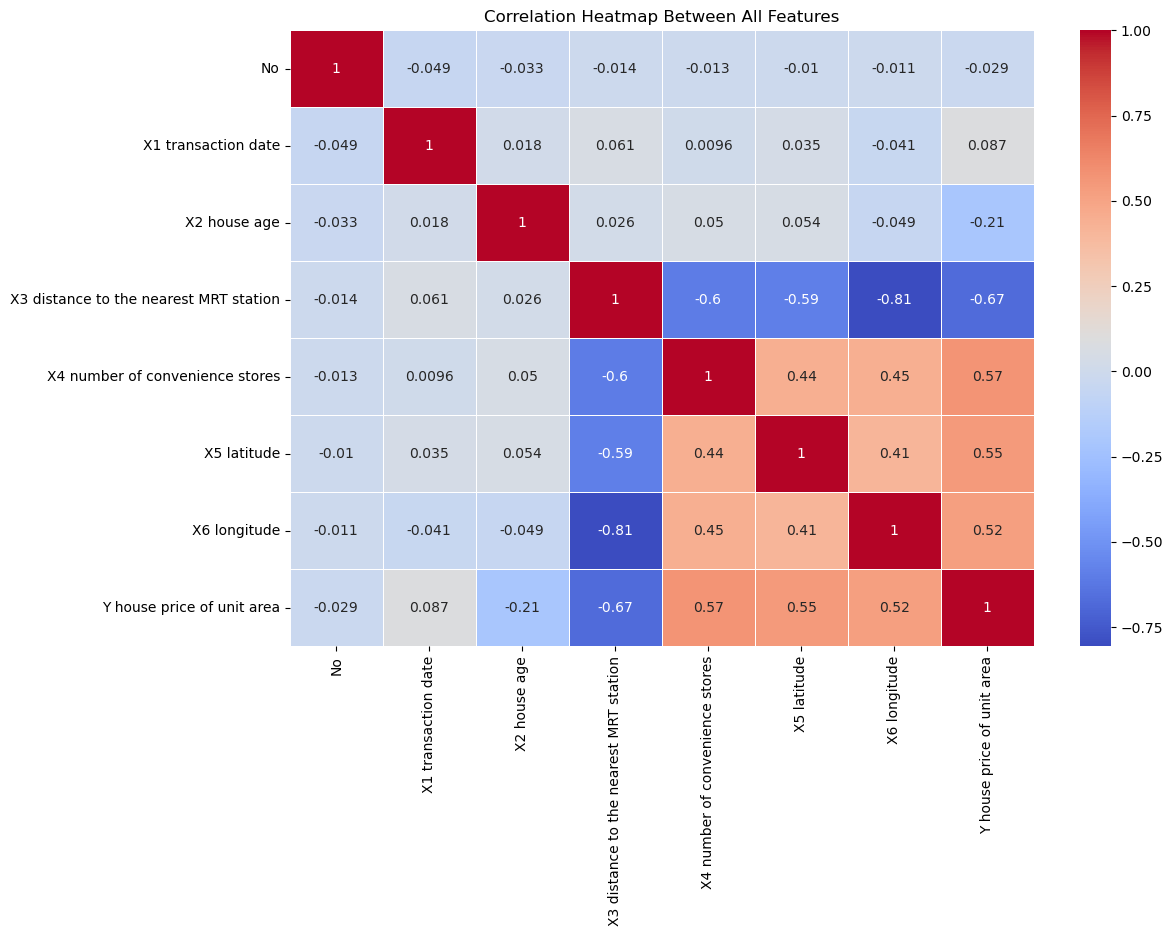


===== Correlation With Target =====
Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64


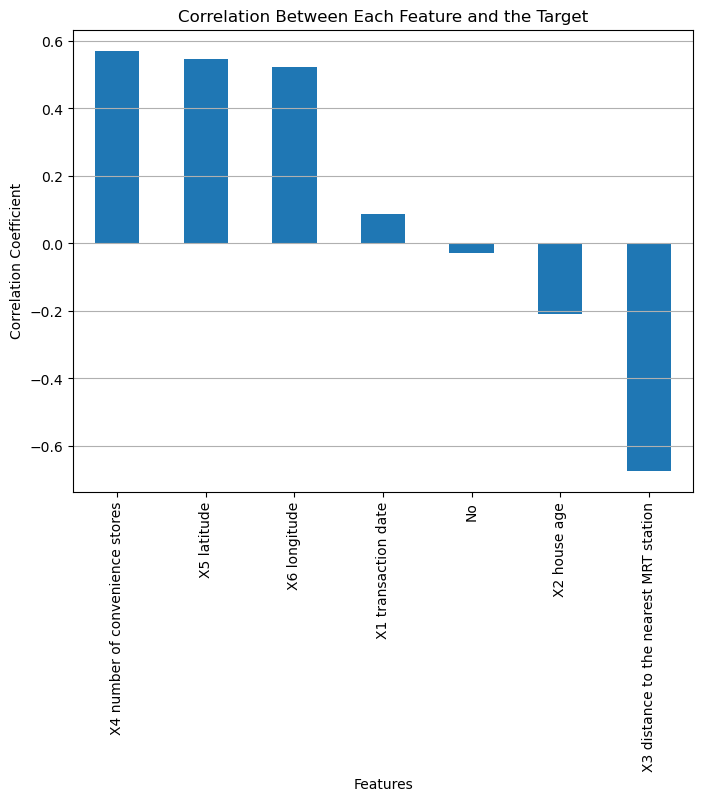

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# 1) تحميل البيانات
# ============================
df = pd.read_csv("Real estate.csv")   # تأكد من اسم الملف

# ============================
# 2) حساب مصفوفة الارتباط
# ============================
corr_matrix = df.corr()

# ============================
# 3) عرض مصفوفة الارتباط
# ============================
print("===== Correlation Matrix =====")
print(corr_matrix)

# ============================
# 4) رسم Heatmap للمصفوفة
# ============================
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap Between All Features")
plt.show()

# ============================
# 5) استخراج الارتباط مع الهدف فقط
# ============================
target = 'Y house price of unit area'
corr_with_target = corr_matrix[target].sort_values(ascending=False)

print("\n===== Correlation With Target =====")
print(corr_with_target)

# ============================
# 6) رسم الارتباط بين الميزات والهدف
# ============================

plt.figure(figsize=(8, 6))
corr_with_target.drop(target).plot(kind='bar')
plt.title("Correlation Between Each Feature and the Target")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.grid(axis='y')
plt.show()


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ----------------------------------------
# 1) تحميل الملفات الجاهزة
# ----------------------------------------
X_train = pd.read_csv("X_train.csv")
X_val   = pd.read_csv("X_val.csv")
X_test  = pd.read_csv("X_test.csv")



# ----------------------------------------
# 2) إنشاء StandardScaler
# ----------------------------------------
scaler = StandardScaler()

# ----------------------------------------
# 3) Scaling على X_train فقط (fit)
# ----------------------------------------
X_train_scaled = scaler.fit_transform(X_train)

# ----------------------------------------
# 4) Scaling على X_val و X_test (transform فقط)
# ----------------------------------------
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------------
# 5) إعادة التحويل إلى DataFrame مع نفس أسماء الأعمدة
# ----------------------------------------
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled   = pd.DataFrame(X_val_scaled,   columns=X_val.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X_test.columns)

# ----------------------------------------
# 6) حفظ الملفات بعد الـ Scaling
# ----------------------------------------
X_train_scaled.to_csv("X_train_scaled.csv", index=False)
X_val_scaled.to_csv("X_val_scaled.csv", index=False)
X_test_scaled.to_csv("X_test_scaled.csv", index=False)



print("✔ تم حفظ الملفات بنجاح!")
print("الملفات المحفوظة:")
print("- X_train_scaled.csv")
print("- X_val_scaled.csv")
print("- X_test_scaled.csv")


✔ تم حفظ الملفات بنجاح!
الملفات المحفوظة:
- X_train_scaled.csv
- X_val_scaled.csv
- X_test_scaled.csv
